In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Apple Stock Price Prediction practice/AAPL.csv', date_parser=True)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400
1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200
2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000
3,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800
4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700


In [5]:
df['last_close'] = df['Close'].shift(1)

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close
0,2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400,NaN
1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200,30.572857
2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000,30.625713
3,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800,30.138571
4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700,30.082857


In [7]:
df['return'] = (df['Close'] - df['last_close']) / df['last_close']

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,return
0,2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400,NaN,NaN
1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200,30.572857,0.001729
2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000,30.625713,-0.015906
3,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800,30.138571,-0.001849
4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700,30.082857,0.006648


In [9]:
df = df[1:]

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,return
1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200,30.572857,0.001729
2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000,30.625713,-0.015906
3,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800,30.138571,-0.001849
4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700,30.082857,0.006648
5,2010-01-11,30.400000,30.428572,29.778572,30.015715,25.984528,115557400,30.282858,-0.008822


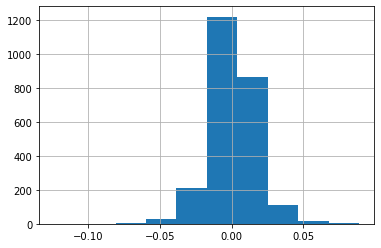

In [11]:
df['return'].hist()

In [12]:
df = df.reset_index()


In [13]:
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,last_close,return
0,1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200,30.572857,0.001729
1,2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000,30.625713,-0.015906
2,3,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800,30.138571,-0.001849
3,4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700,30.082857,0.006648
4,5,2010-01-11,30.400000,30.428572,29.778572,30.015715,25.984528,115557400,30.282858,-0.008822


In [14]:
df.drop(['index'], axis=1, inplace=True)

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,return
0,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200,30.572857,0.001729
1,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000,30.625713,-0.015906
2,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800,30.138571,-0.001849
3,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700,30.082857,0.006648
4,2010-01-11,30.400000,30.428572,29.778572,30.015715,25.984528,115557400,30.282858,-0.008822


In [16]:
df['Return'] = df['return']>0

In [17]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,return,Return
0,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200,30.572857,0.001729,True
1,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000,30.625713,-0.015906,False
2,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800,30.138571,-0.001849,False
3,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700,30.082857,0.006648,True
4,2010-01-11,30.400000,30.428572,29.778572,30.015715,25.984528,115557400,30.282858,-0.008822,False


In [18]:
df.Return.replace({True : 1, False : 0}, inplace=True)

In [19]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,last_close,return,Return
0,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200,30.572857,0.001729,1
1,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000,30.625713,-0.015906,0
2,2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800,30.138571,-0.001849,0
3,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700,30.082857,0.006648,1
4,2010-01-11,30.400000,30.428572,29.778572,30.015715,25.984528,115557400,30.282858,-0.008822,0


In [20]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'last_close', 'return', 'Return'],
      dtype='object')

In [21]:
df.drop(['Adj Close', 'last_close', 'return'], axis=1, inplace=True)

In [22]:
df.head()

,Date,Open,High,Low,Close,Volume,Return
0,2010-01-05,30.657143,30.798571,30.464285,30.625713,150476200,1
1,2010-01-06,30.625713,30.747143,30.107143,30.138571,138040000,0
2,2010-01-07,30.250000,30.285715,29.864286,30.082857,119282800,0
3,2010-01-08,30.042856,30.285715,29.865715,30.282858,111902700,1
4,2010-01-11,30.400000,30.428572,29.778572,30.015715,115557400,0


In [23]:
train = df[df['Date']<='2018-12-31']
test = df[df['Date']>'2018-12-31']

In [24]:
x_train = train[['Open', 'High', 'Low', 'Close', 'Volume']].values
y_train = train['Return'].values

In [25]:
x_test = test[['Open', 'High', 'Low', 'Close', 'Volume']].values
y_test = test['Return'].values

In [26]:
x_train.shape

(2263, 5)

In [27]:
time_step = 10
D = x_train.shape[1]
len_train = x_train.shape[0]
len_test = x_test.shape[0]

## Scaling of Train and Test Data

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [31]:
X_train = np.zeros((len_train, time_step, D))
Y_train = y_train

for t in range(len_train-time_step):
    X_train[t,:,:] = x_train[t: t+time_step]
    

In [32]:
X_train.shape

(2263, 10, 5)

In [33]:
Y_train.shape

(2263,)

In [34]:
last_10 = x_train[len_train-time_step:len_train]

In [35]:
x_test = np.concatenate((last_10, x_test))

In [36]:
x_test.shape

(220, 5)

In [37]:
X_test = np.zeros((len_test, time_step, D))
Y_test = y_test

for t in range(len_test):
    X_test[t,:,:] = x_test[t: t+time_step]
    

In [38]:
X_test.shape

(210, 10, 5)

In [39]:
Y_test.shape

(210,)

In [40]:
X_train.shape

(2263, 10, 5)

In [41]:
Y_train.shape

(2263,)

## LSTM Model

In [42]:
model = tf.keras.models.Sequential([
     tf.keras.layers.LSTM(50, activation='relu', input_shape=(10,5), return_sequences=True),
                                    

                                    tf.keras.layers.LSTM(80, activation='relu', return_sequences=True),
                                    

                                    tf.keras.layers.LSTM(80, activation='relu', return_sequences=True),
                                    

                                    tf.keras.layers.LSTM(100, activation='relu', return_sequences=True),
                                    

                                    

                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [43]:
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [44]:
model.fit(X_train, Y_train, epochs=200, validation_data=(X_test, Y_test))

Epoch 1/200
71/71 [==============================] - 2s 35ms/step - loss: 0.6929 - accuracy: 0.5212 - val_loss: 0.6889 - val_accuracy: 0.5667
Epoch 2/200
71/71 [==============================] - 2s 27ms/step - loss: 0.6923 - accuracy: 0.5228 - val_loss: 0.6886 - val_accuracy: 0.5667
Epoch 3/200
71/71 [==============================] - 2s 27ms/step - loss: 0.6923 - accuracy: 0.5227 - val_loss: 0.6878 - val_accuracy: 0.5667
Epoch 4/200
71/71 [==============================] - 2s 27ms/step - loss: 0.6921 - accuracy: 0.5218 - val_loss: 0.6860 - val_accuracy: 0.5667
Epoch 5/200
71/71 [==============================] - 2s 27ms/step - loss: 0.6920 - accuracy: 0.5255 - val_loss: 0.6877 - val_accuracy: 0.5614
Epoch 6/200
71/71 [==============================] - 2s 27ms/step - loss: 0.6926 - accuracy: 0.5261 - val_loss: 0.6877 - val_accuracy: 0.5667
Epoch 7/200
71/71 [==============================] - 2s 27ms/step - loss: 0.6921 - accuracy: 0.5230 - val_loss: 0.6875 - val_accuracy: 0.5671
Epoch 

In [44]:
## Here, Val Accuracy is not on either extremes it is in between which is near about 50%. That states that model can not classify the positive or negative return too. So in total we can't 
## predict the Stock Price or Return using LSTM only as they depend on many other factors too. It's not as easy as to just observe the pattern in them and make a future prediction.